**`Функция потеря (loss function)`** : Функция, которая показывает насколько действительные значения откланяются от тех, что были созданы пробной функцией.

**`Регрессия`** : Способ выбрать функцию, что будет наилучшим(оптимальным) образом описывать точки. Лучшая - та что минимизирует функцию потерь, то есть значения ошибки будет минимально возможным в данной ситуации.

----
**`Линейная регрессия`** :  Линейная функция зависимости целевой переменной от одной или нескольких других переменных(предикторов)
$$
y = wX+b
$$

В случаи многомерной регресси, добавляется фиктивный столбец единиц $x_0$ и $b(w_0)$ рассчитывается как его коэффициент
$$
y = \theta_0X_0 + \theta_1X_1 + ... \theta_nX_n
$$
$$
y = \theta X
$$

$y$ - Целевое значение, которые необхидимо предсказать. (target)\
$X$ - Признаки включая фиктивный\
$w(\theta_i)$ - Вес при признаках. (Коэффициент наклона) (**coef_**)\
$b(\theta_0)$ - Свободный член. (Коэффициент сдвига) (**intercept_**) 

Цель регрессии — найти коэффициенты этой линейной комбинации, и тем самым определить регрессионную функцию, что наилучшим образом будет описывать заданную тенденцию.

Определить **loss-функцию** -> задать начальные параметры весов -> определить метод оптимизации -> минимизировать ошибку -> оценить по метрикам.

---

# Ordinary List Squares

**Метод наименьших квадратов** Аналитическое решение для задачи регрессии. \
Нормальное уравнение для нахождения коэффициентов линейной регрессии
$$
\vec{w} = (X^T X)^{-1} X^T \vec{y}
$$
- $\vec{w}$ – (искомый) вектор весов  
- $X$ – матрица признаков  
- $X^T$ – транспонированная матрица признаков  
- $\vec{y}$ – вектор целевых значений  
- ${}^{-1}$ – обратная матрица  

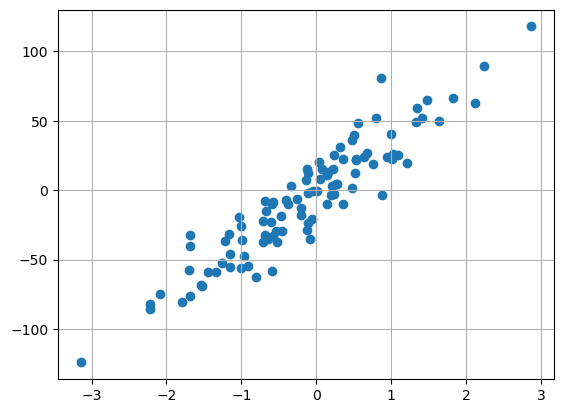

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
X, y = make_regression(n_samples=100, n_features=1, n_informative=1, noise=15, random_state=12)

plt.grid()
plt.scatter(X, y);

**Добавление фиктивного столбца единиц**

In [20]:
ones = np.ones((X.shape[0], 1))
X = np.hstack((ones, X))

**Нормальное уравнение**

In [26]:
# Проверка на выражденность
np.linalg.det(X.T@X)

111.4837082150251

In [26]:
OLS = np.linalg.inv(X.T@X)@X.T@y
intercept_, coef_ = OLS[0], OLS[1]
coef_, intercept_

(37.73996473539595, -1.1588320019517484)

**Сравнение с scikit-learn**

In [16]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X, y)
linreg.coef_, linreg.intercept_

(array([37.73996474]), -1.158832001951743)

## OLS SVD

Наиболее устойчивый способ решения задачи **МНК** способен обработать матрицу в случаи её вырожденности и мульиколлениарности.

**Сингулярное разложение**: Сингулярные числа - это корни из собственных значений матрицы $X^TX$. Это неотрицательные числа, которые указывают на "важность" или "влияние" соответствующих сингулярных векторов в разложении.
$$
X = USV^T
$$

$X$ - Исходная матрица признаков $m * n$\
$U$ - Ортнормальная матрица $m*m$. Матрица левых сингулярных векторов.\
$S$ - Диагональная матрица сингулярных векторов. $m*n$\
$V^T$ - Транспонированная ортнормальная матрица правых векторов $n*n$

----
Метод наименьших квадратов с сингулярным разложением выражается как
$$
\vec{w} = (X^T X)^{-1} X^T \vec{y}
$$
$$
X^T = (USV^T)^T = U^TS^TV
$$
$U$ - Ортоганальная матрица => $U^TU=I$ и остается
$$
X^TX = (U^TS^TV)(USV^T) = S^TVSV^T
$$
Обратная матрица: Поскольку $U$ и $V$ ортонормальные(ортогональные матрицы), то $Q^T=Q^{-1}$, значит $V^{-1}=V^T$ а $(V^T)^{-1}=V$
$$
(X^TX)^{-1} = (S^TVSV^T)^{-1} = V(S^TS)^{-1}V^T
$$
Подставляем в уравнение
$$
(X^TX)^{-1}X^T \vec{y} = V(S^TS)^{-1}V^TU^TS^TV\vec{y}
$$

$V^TV = I$ => они себя нейтрализуют о остается
$$
(X^TX)^{-1}X^T \vec{y} = V(S^TS)^{-1}U^TS^T\vec{y}
$$
$(S^TS)^{-1}$ - диагональная матрица её можно скомпоновать взяв **ПСЕВДООБРАТНУЮ**
$$
\vec{w} = (X^TX)^{-1}X^T \vec{y} = V^TS^+U^T\vec{y}
$$
$S^+$ - псевдообратная матрица $S$ (это матрица, которая инвертирует только ненулевые сингулярные значения).

### Выражденная матрица

In [221]:
x1 = np.arange(1, 101).reshape(-1, 1)
x2 = (x1*2).reshape(-1, 1)
x3 = (x2*3).reshape(-1, 1)
x4 = (x2*3 + x3*4).reshape(-1, 1)

X = np.hstack((x1, x2))
X = np.hstack((X, x3))
X = np.hstack((X, x4))

y = np.arange(1, 200, 2)
X.shape, y.shape

((100, 4), (100,))

In [226]:
ones = np.ones(X.shape[0]).reshape(-1, 1)
X = np.hstack((ones, X))

In [227]:
np.linalg.det(X.T@X), np.linalg.matrix_rank(X.T@X)

(0.0, 2)

Детерминант равен нулю и ранг меньше количества столбцов => матрица **сингулярна**

In [228]:
OLS = np.linalg.inv(X.T@X)@X.T@y

LinAlgError: Singular matrix

### Сингулярное разложение

In [273]:
U, S, VT = np.linalg.svd(X, full_matrices=False)
S = np.diag(S)

In [274]:
U.shape, S.shape, VT.shape

((100, 5), (5, 5), (5, 5))

#### Реконструкция

In [275]:
X_reconst = U@S@VT

In [276]:
X.shape

(100, 5)

In [277]:
X_reconst[0:5]

array([[  1.,   1.,   2.,   6.,  30.],
       [  1.,   2.,   4.,  12.,  60.],
       [  1.,   3.,   6.,  18.,  90.],
       [  1.,   4.,   8.,  24., 120.],
       [  1.,   5.,  10.,  30., 150.]])

In [278]:
X[0:5]

array([[  1.,   1.,   2.,   6.,  30.],
       [  1.,   2.,   4.,  12.,  60.],
       [  1.,   3.,   6.,  18.,  90.],
       [  1.,   4.,   8.,  24., 120.],
       [  1.,   5.,  10.,  30., 150.]])

In [279]:
np.linalg.det(X_reconst.T@X_reconst)

8.413674870724915e-20

Детерминант реконструированной матрицы уже не равен нулю, и матрица не является выражденной

In [280]:
VT.T@np.linalg.pinv(S)@U.T@y

array([-1.        ,  0.0021254 ,  0.0042508 ,  0.01275239,  0.06376196])

### Решение через pinv

Псевдообратная матрица, реализует в себе **SVD**

In [281]:
np.linalg.pinv(X).dot(y)

array([-1.        ,  0.0021254 ,  0.0042508 ,  0.01275239,  0.06376196])

### Решение через lstsq

Метод наименьших квадратов, реализованный в **numpy** также реализует **SVD**

In [282]:
np.linalg.lstsq(X, y, rcond=1e-6)[0]

array([-1.        ,  0.0021254 ,  0.0042508 ,  0.01275239,  0.06376196])

### Решение через sklearn

Реализация **OLS** с **SVD** в модели регрессии в sklearn

In [283]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X, y)
linreg.intercept_, linreg.coef_

(-1.0, array([0.        , 0.0021254 , 0.0042508 , 0.01275239, 0.06376196]))